**Rating Discrepancy Visuals of Three Review Datastets**

**IMPORTS**

In [1]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\60101292\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**REVIEW DATASETS** (Processed)

In [8]:
df_spot =  pd.read_csv('spotify_reviews.csv') # https://www.kaggle.com/datasets/ashishkumarak/spotify-reviews-playstore-daily-update
df_play=  pd.read_csv('google_reviews.csv') # https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews
df_aware=  pd.read_csv('AWARE_Comprehensive.csv') # https://zenodo.org/records/5528481

**PLOTS**

In [9]:
def plot_sentiment_histograms_paper(
    df,
    content_col='content',
    score_col='score',
    palette=('royalblue', 'slategray'),
    figsize=(6, 3.5),
    dpi=300,
    title=None,
    save_path=None
):
    """
    Publication-quality comparison of true ratings vs. sentiment-derived ratings,
    with an optional dynamic title.
    """
    # ── 0. Matplotlib global style tweaks ────────────────────────────────
    rcParams.update({
        "font.family": "serif",
        "font.size": 9,
        "axes.linewidth": 0.6,
        "axes.spines.right": False,
        "axes.spines.top":   False,
        "xtick.major.size": 3,
        "ytick.major.size": 3,
        "figure.autolayout": True,
    })

    # ── 1. Compute sentiment polarity & rescale ───────────────────────────
    analyzer = SentimentIntensityAnalyzer()
    dfc = df.copy()
    dfc['Sentiment_Polarity'] = dfc[content_col].apply(
        lambda t: analyzer.polarity_scores(t)['compound'] if isinstance(t, str) else 0.0
    )
    min_p, max_p = dfc['Sentiment_Polarity'].agg(['min', 'max'])
    dfc['Sentiment_Rating'] = (dfc['Sentiment_Polarity'] - min_p) / (max_p - min_p) * 4 + 1

    # ── 2. Bin into 1–5 buckets ───────────────────────────────────────────
    bins   = [0, 1.4, 2.4, 3.4, 4.4, 5]
    labels = [1, 2, 3, 4, 5]
    dfc['Sentiment_Label'] = pd.cut(dfc['Sentiment_Rating'], bins=bins, labels=labels, include_lowest=True)
    dfc['Rating_Label']    = pd.cut(dfc[score_col],        bins=bins, labels=labels, include_lowest=True)

    sent_counts = dfc['Sentiment_Label'].value_counts().sort_index()
    true_counts = dfc['Rating_Label'].value_counts().sort_index()

    # ── 3. Plotting ──────────────────────────────────────────────────────
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    if title:
        ax.set_title(title, fontsize=10, pad=8)

    width = 0.35
    x = sent_counts.index.astype(int)

    ax.bar(x - width/2, true_counts.values, width,
           label='Actual ratings',   color=palette[0], edgecolor='black', linewidth=0.4)
    ax.bar(x + width/2, sent_counts.values, width,
           label='Sentiment ratings', color=palette[1], edgecolor='black', linewidth=0.4)

    ax.set_xlabel('Rating bucket')
    ax.set_ylabel('Review count')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend(frameon=False, fontsize=8)
    ax.grid(axis='y', linewidth=0.3, alpha=0.5)

    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', fontsize=7, padding=2)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=dpi)
    else:
        plt.show()



**SPOTIFY**

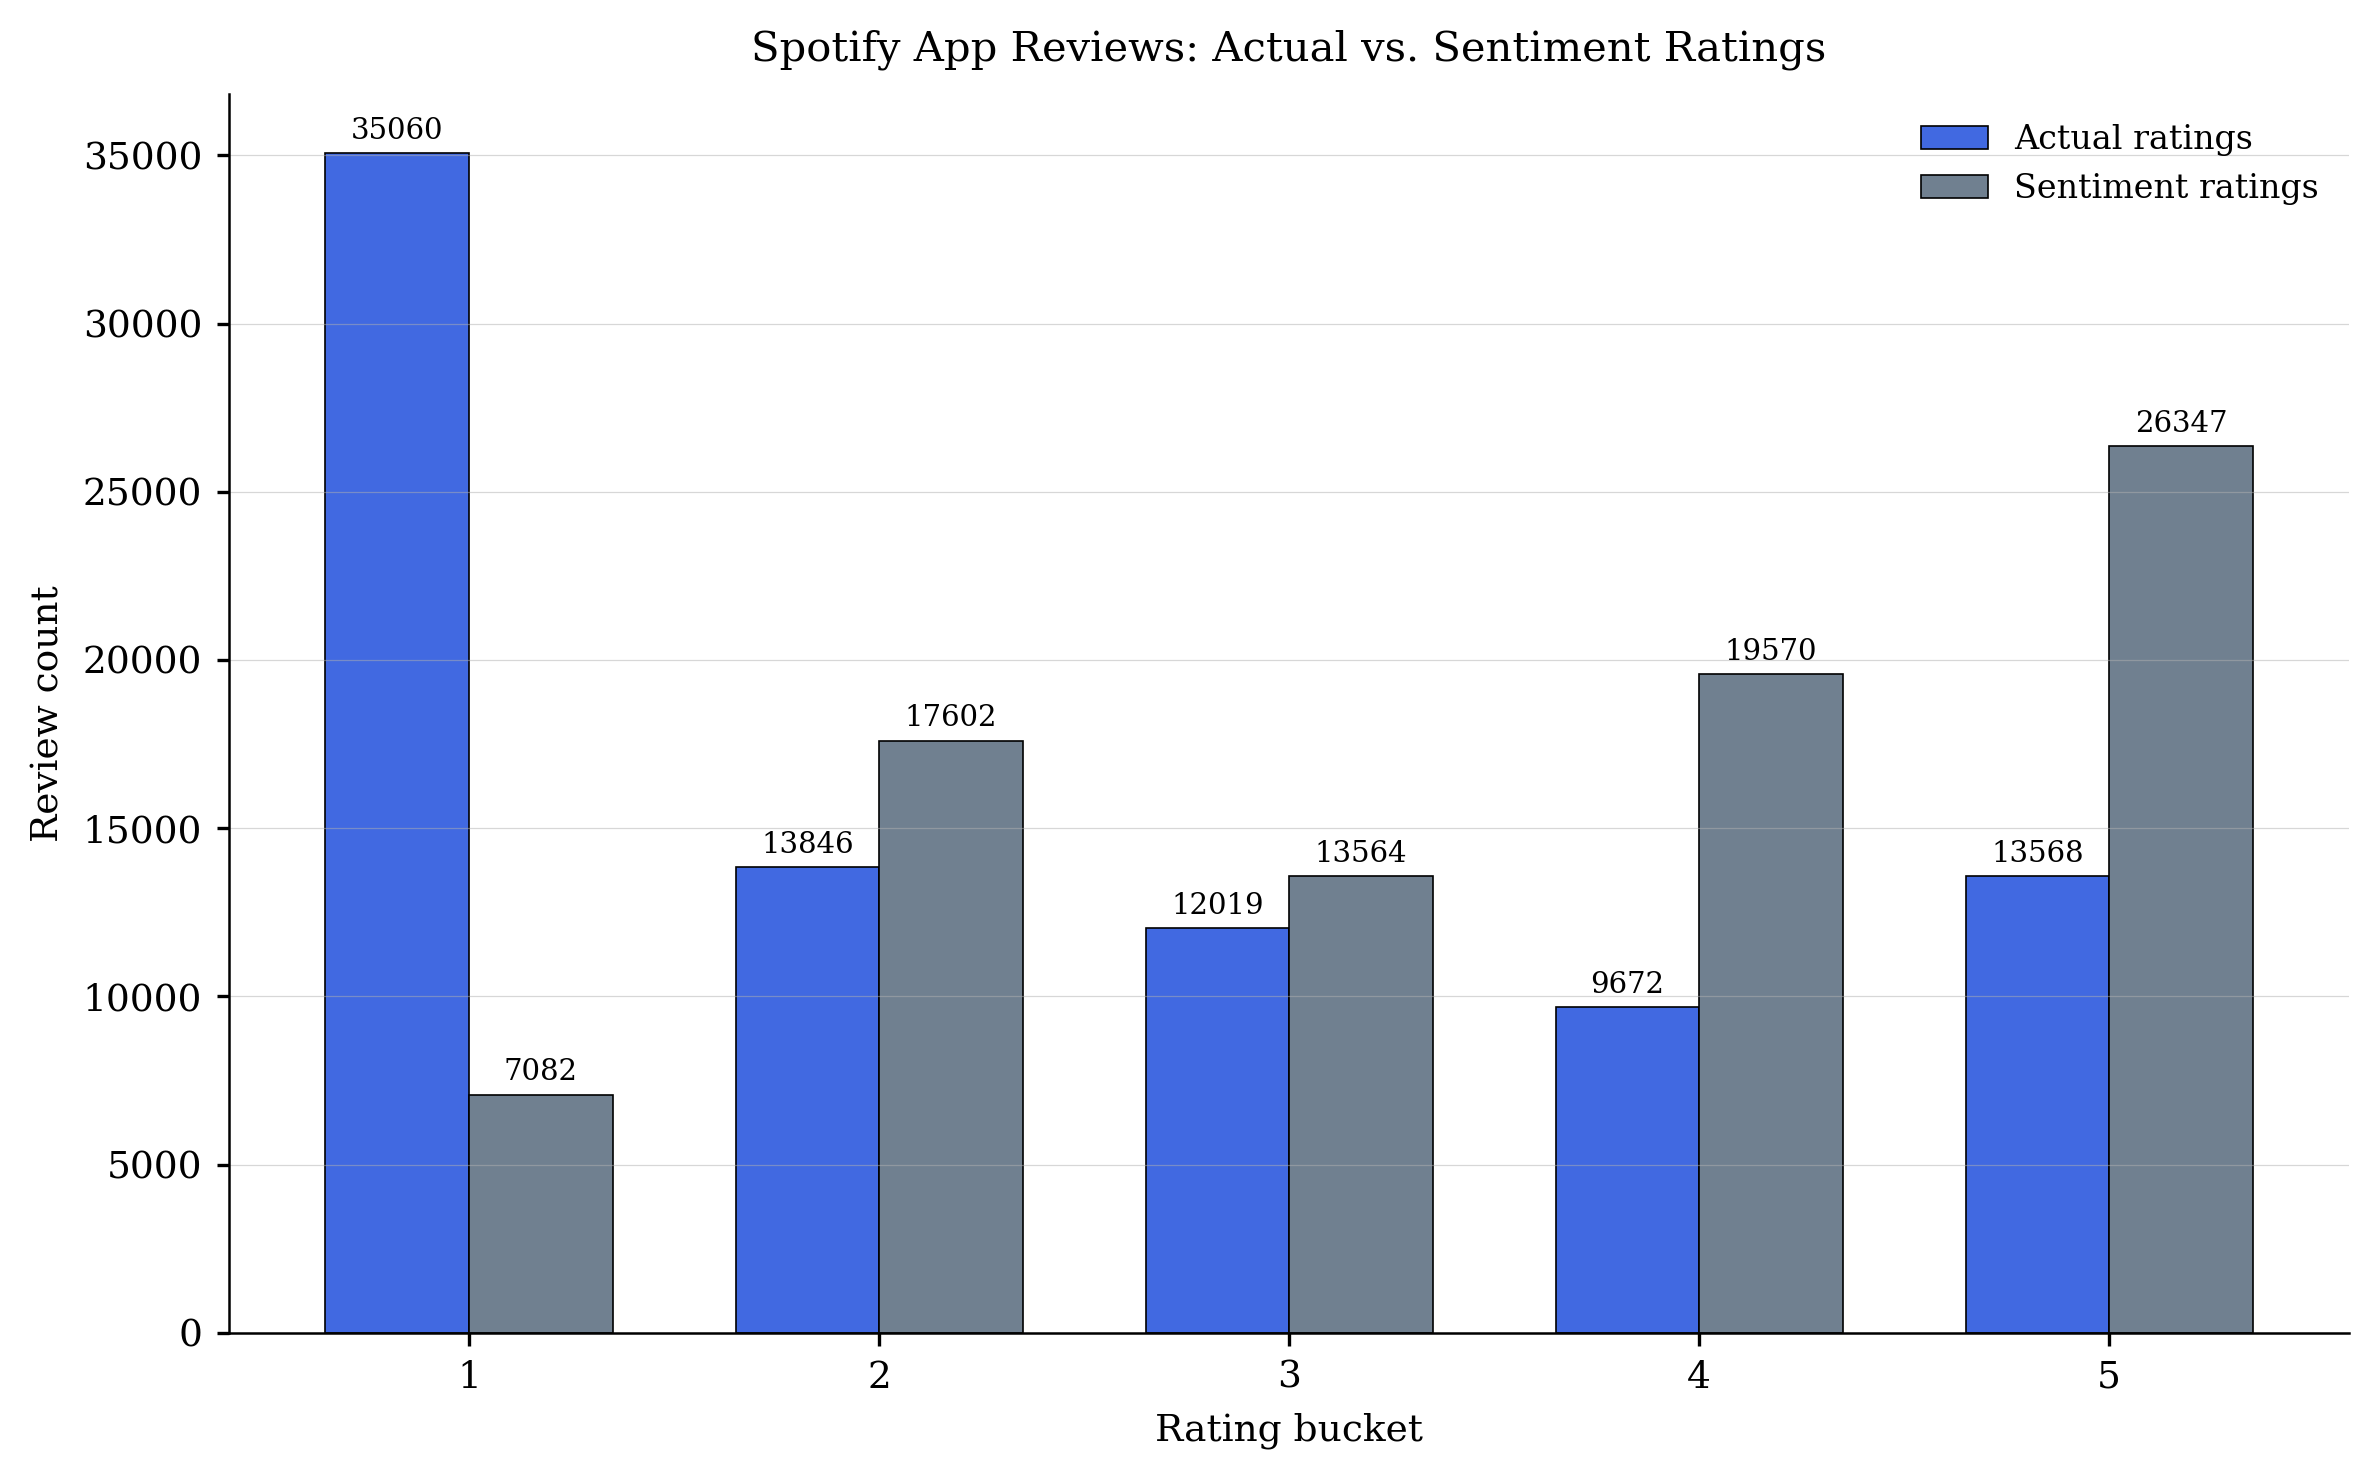

In [10]:

plot_sentiment_histograms_paper(
    df_spot,
    title="Spotify App Reviews: Actual vs. Sentiment Ratings",
    save_path="fig_spotify_ratings_vs_sentiment.pdf",
    figsize=(8, 5) # Example size, adjust as needed
)

**GOOGLE PLAY STORE**

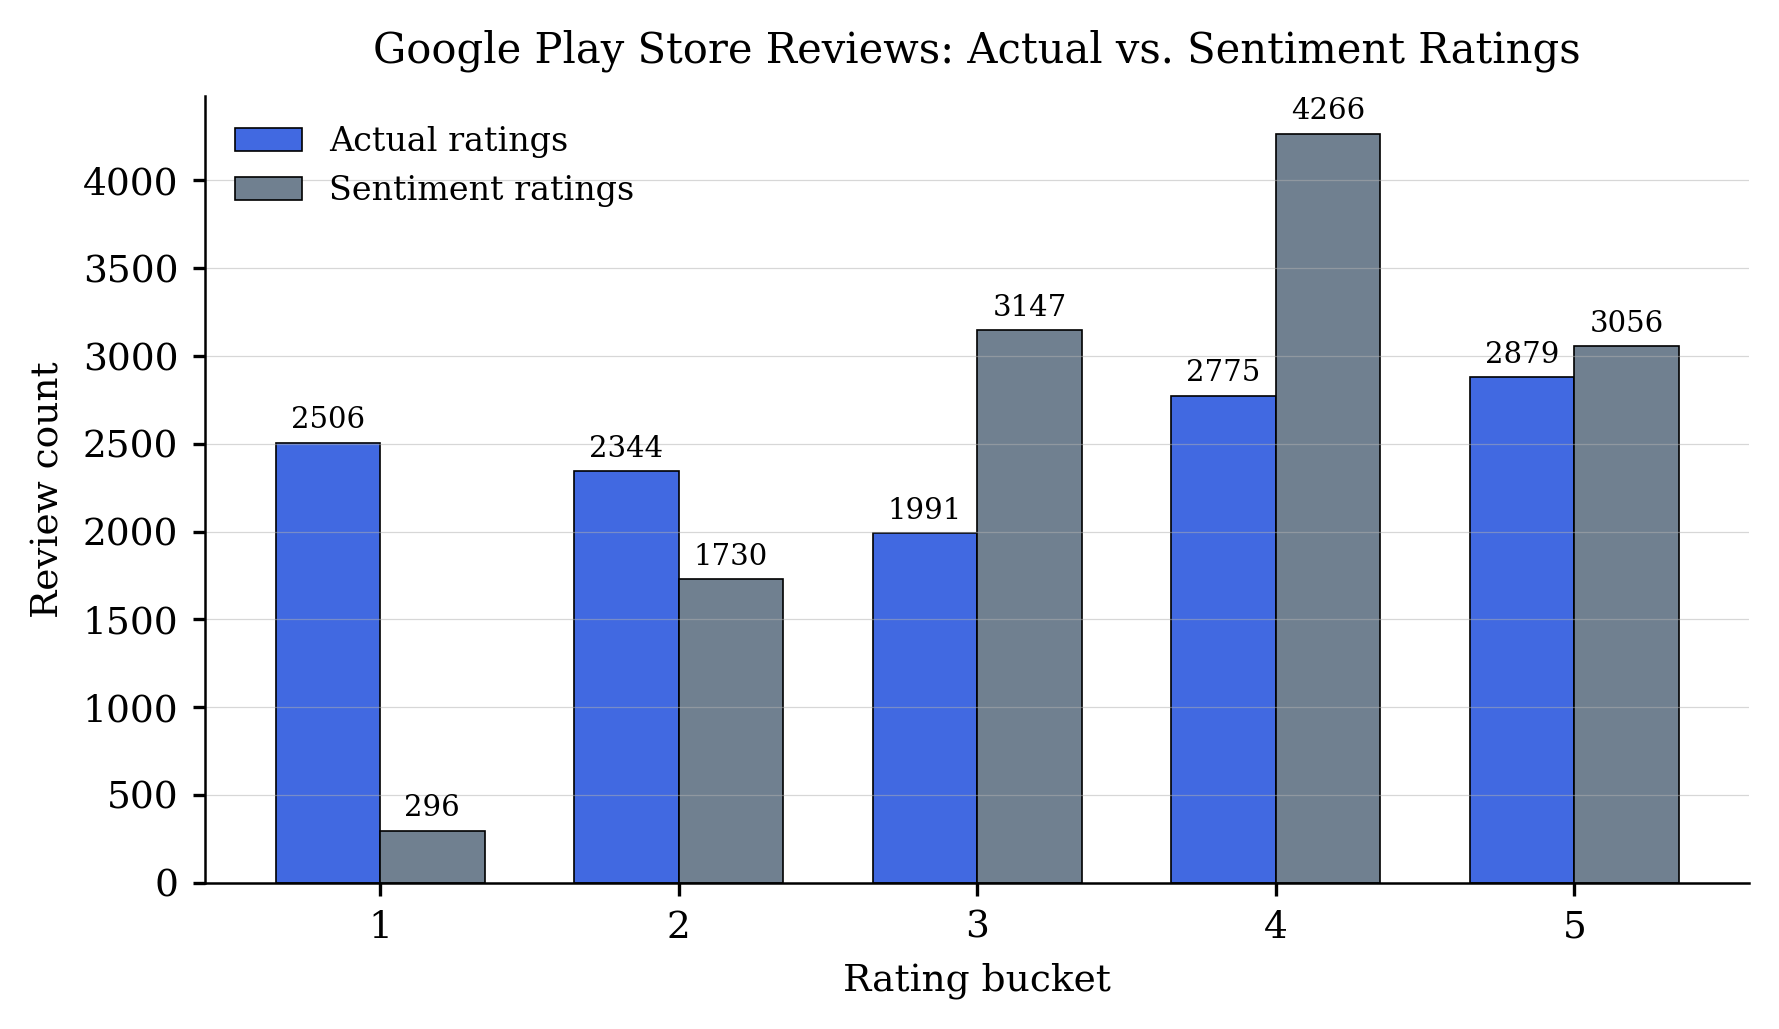

In [10]:
plot_sentiment_histograms_paper(
    df_play,
    title="Google Play Store Reviews: Actual vs. Sentiment Ratings",
    save_path="fig_spotify_ratings_vs_sentiment.pdf"
)

**AWARE**

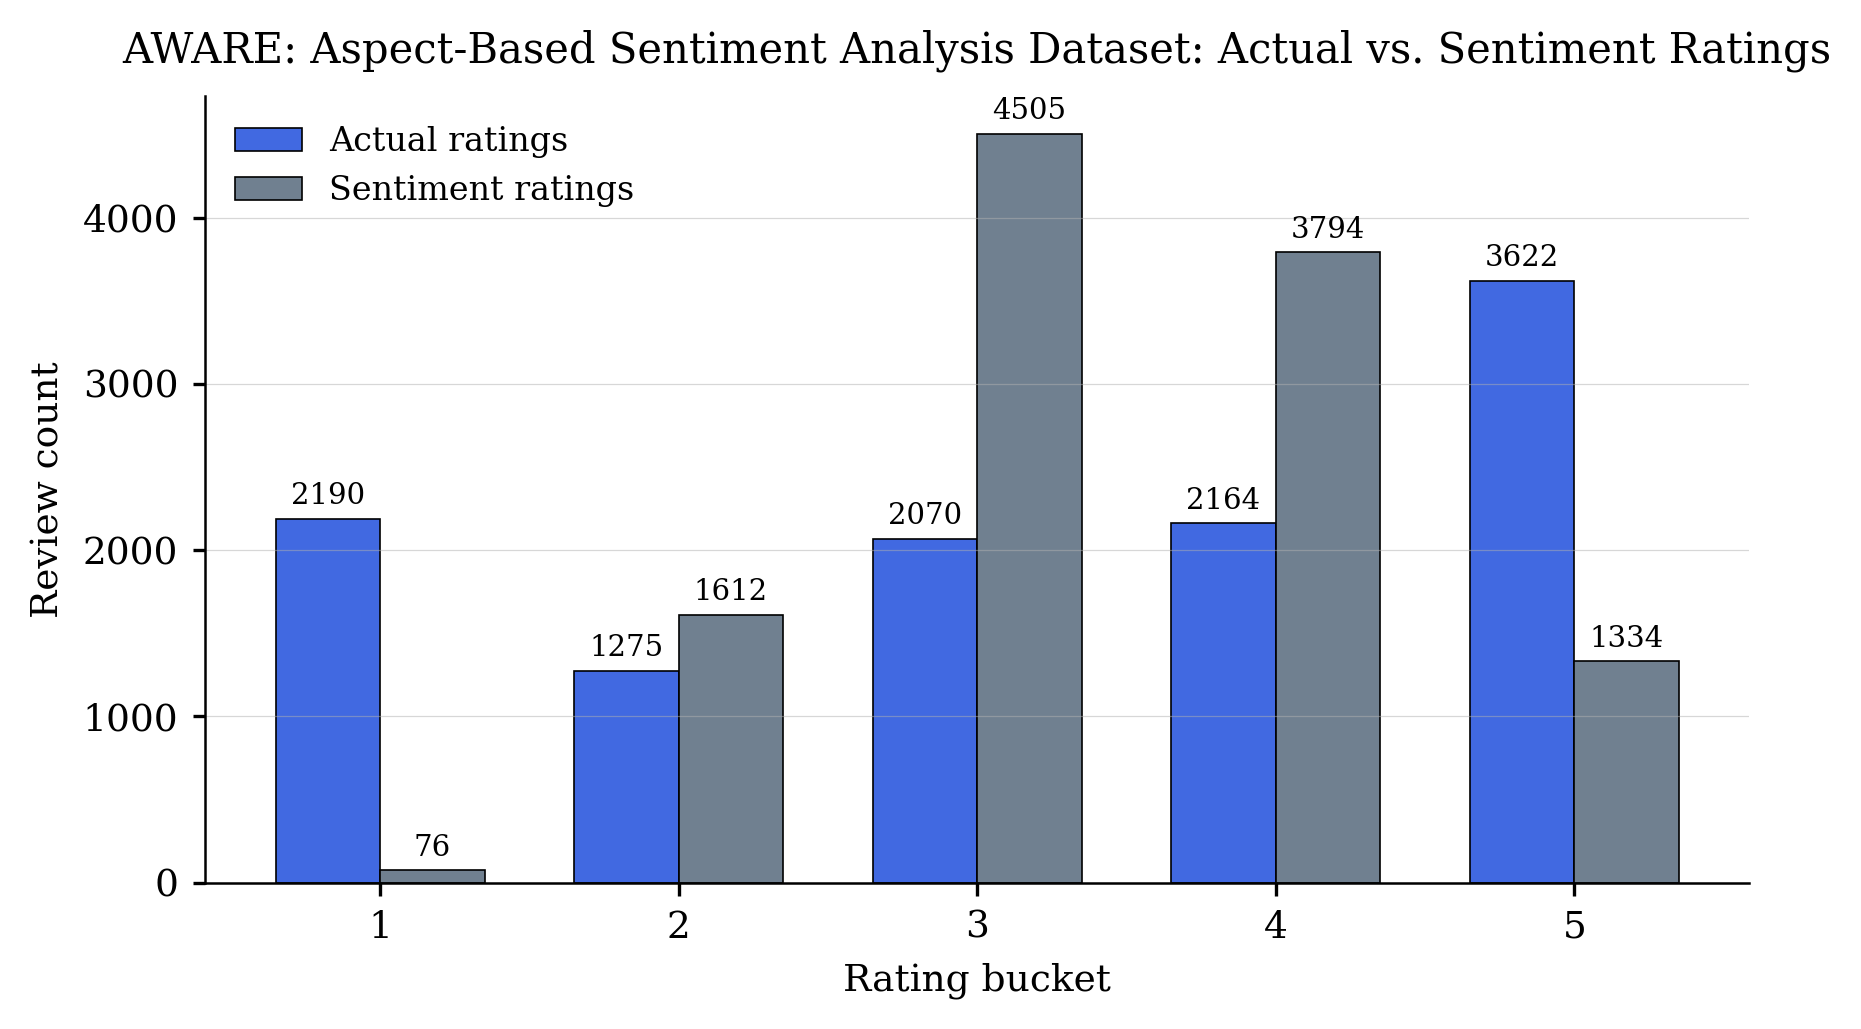

In [12]:
plot_sentiment_histograms_paper(
    df_aware,
    content_col='sentence',
    score_col='rating',
    title="AWARE: Aspect-Based Sentiment Analysis Dataset: Actual vs. Sentiment Ratings",
    save_path="fig_spotify_ratings_vs_sentiment.pdf"
)
